In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
data['Purchased'].value_counts(normalize=True) ##percentage of counts

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [7]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### one hot encoding to convert cetegorical column gender

In [8]:
data=pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [15]:
##splitting data
from sklearn.model_selection import train_test_split
X=data.drop(['Purchased','User ID'],axis=1)
Y=data['Purchased']
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)


In [16]:
x_train.shape

(320, 4)

## logic egression

In [19]:
from sklearn.linear_model import LogisticRegression
log_regr=LogisticRegression()
log_regr.fit(x_train,y_train)
y_pred=log_regr.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score,precision_score,recall_score

In [21]:
print(f'acuracy of model is -{accuracy_score(y_test,y_pred)}')
print(f'pecision of the model is- {precision_score(y_test,y_pred)}')
print(f'f_1 score {f1_score(y_test,y_pred)}')
print(f'recall score {recall_score(y_test,y_pred)}')

acuracy of model is -0.65
pecision of the model is- 0.0
f_1 score 0.0
recall score 0.0


C:\Users\sarath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [28,  0]], dtype=int64)

## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc_values.append(accuracy)
acc_values
    

[0.8,
 0.8,
 0.825,
 0.775,
 0.8125,
 0.775,
 0.7875,
 0.775,
 0.8,
 0.775,
 0.75,
 0.7625]

Text(0, 0.5, 'accuracy')

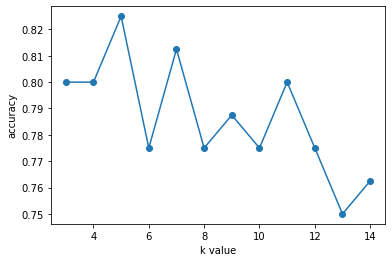

In [33]:
plt.plot(neighbours,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [34]:
#from the graph its clear that max accuracy at k value 5

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(f'acuracy of model is -{accuracy_score(y_test,y_pred)}')
print(f'pecision of the model is- {precision_score(y_test,y_pred)}')
print(f'f_1 score {f1_score(y_test,y_pred)}')
print(f'recall score {recall_score(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

acuracy of model is -0.825
pecision of the model is- 0.7692307692307693
f_1 score 0.7407407407407408
recall score 0.7142857142857143


array([[46,  6],
       [ 8, 20]], dtype=int64)

In [36]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


## standard scaling

In [37]:
from  sklearn.preprocessing import StandardScaler
standardisation=StandardScaler()
x_test=standardisation.fit_transform(x_test)
x_train=standardisation.fit_transform(x_train)

In [38]:
#logistic regression
log_regr=LogisticRegression()
log_regr.fit(x_train,y_train)
y_pred=log_regr.predict(x_test)
print(f'acuracy of model is -{accuracy_score(y_test,y_pred)}')
print(f'pecision of the model is- {precision_score(y_test,y_pred)}')
print(f'f_1 score {f1_score(y_test,y_pred)}')
print(f'recall score {recall_score(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

acuracy of model is -0.875
pecision of the model is- 0.875
f_1 score 0.8076923076923077
recall score 0.75


array([[49,  3],
       [ 7, 21]], dtype=int64)

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc_values.append(accuracy)
acc_values
    

[0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925]

Text(0, 0.5, 'accuracy')

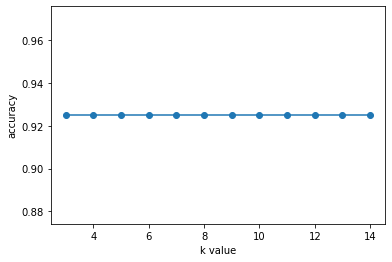

In [40]:
plt.plot(neighbours,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')#since graph show same accuracy for all k values we take same k value as before
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(f'acuracy of model is -{accuracy_score(y_test,y_pred)}')
print(f'pecision of the model is- {precision_score(y_test,y_pred)}')
print(f'f_1 score {f1_score(y_test,y_pred)}')
print(f'recall score {recall_score(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

acuracy of model is -0.925
pecision of the model is- 0.8666666666666667
f_1 score 0.896551724137931
recall score 0.9285714285714286


array([[48,  4],
       [ 2, 26]], dtype=int64)

In [ ]:
# svm decision tree have to do using sklearn